# 09 NumPy Library
## . Why NumPy Matters (Especially for CV & Medical Imaging)
NumPy is the numerical backbone of Python scientific computing. In computer vision and medical imaging, almost everything—images, volumes (CT/MRI), masks, kernels—is ultimately represented as NumPy arrays.

Key reasons NumPy is essential:

- Performance: Vectorized operations run in optimized C, far faster than Python loops.
- Memory efficiency: Homogeneous, contiguous memory layout.
- Ecosystem: OpenCV, scikit-image, SciPy, PyTorch, TensorFlow all rely on NumPy-like tensors.
In CV terms: An image is just a NumPy array with shape (H, W) or (H, W, C)

## 2. Importing NumPy (Professional Convention)
import numpy as np

Why np?

- Community standard
- Improves readability in research and production code
## 3. Creating NumPy Arrays

In [6]:
# 2. Importing numpy 
import numpy as np
#3.1 from python lists
arr = np.array([1,2,3,4])
print(arr)
print(type(arr))

[1 2 3 4]
<class 'numpy.ndarray'>


In [10]:
# 3.2 Common Array Creators
np.zeros((3,3)) # Black image/ empty mask


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [12]:
np.ones((2,4)) # White image


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [16]:
np.full((3,3), 255) # Typical white image  in unit 8

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]])

# 4. Array Properties (Critical for Debugging)


In [19]:
img = np.zeros((512, 512, 3))
print(img.shape) #(height, width, channels)
print(img.ndim) # number of dimensions
print(img.size) # total number of elements
print(img.dtype) # data type

(512, 512, 3)
3
786432
float64


In [23]:
# 5. Data Types (dtype)
img1 =  np.array([0,1,2], dtype = np.uint8) # images(0_255)
img2 = np.array([0,1,2], dtype= np.float32) #normalized images, ML inputs

# 6. Indexing and Slicing 

In [28]:
# 6.1 1D Indexing
arr = np.array([10,20,30,40])
print(arr[0]) # first element
print(arr[-1]) #last element

10
40


In [34]:
# 6.2 2D
# Important: Slicing returns a view, not a copy.
img = np.arange(16).reshape(4,4)
print(img[1,2])
# 6.3 Slicing (Regions of Interest _ ROI)
roi = img[1:3, 1:3]
print(roi)

6
[[ 5  6]
 [ 9 10]]


In [36]:
# 7. Vectorized Operations 
img = np.array([[0, 128, 255]])
normalized = img / 255.0
print(normalized)

[[0.         0.50196078 1.        ]]


# 8. Broadcasting
Broadcasting allows operations between arrays of different shapes—used heavily in normalization and augmentation

In [39]:
img = np.ones((3,3))*100
img+50

array([[150., 150., 150.],
       [150., 150., 150.],
       [150., 150., 150.]])

# 9. Aggregation Functions

In [57]:
img = np.array([[1,2,3],
      [4,5,6],
      [7,8,9]
      ])
print(img.mean())
print(img.max())
print(img.min())
# Axis-based operations
print(img.max(axis=0))#column wise
print(img.max(axis=1))#row wiae

5.0
9
1
[7 8 9]
[3 6 9]


# 10. Reshaping Arrays

In [68]:
arr = np.arange(12)
print(arr.reshape((3,4)))
#flattening
print(arr.flatten())#copy
print(arr.ravel()) # view

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [82]:
# 11.Practical CV Example: Image Normalization
def normalize_image(img: np.ndarray) -> np.ndarray:
    if img.dtype != np.uint8:
        raise TypeError("Expected uint8 image")
    return img.astype(np.float32) / 255.0

# Exercise 1
Create a 256×256 grayscale image filled with zeros.

Image Shape: (256, 256)
Data Type: uint32
Min Value: 0, Max Value: 0


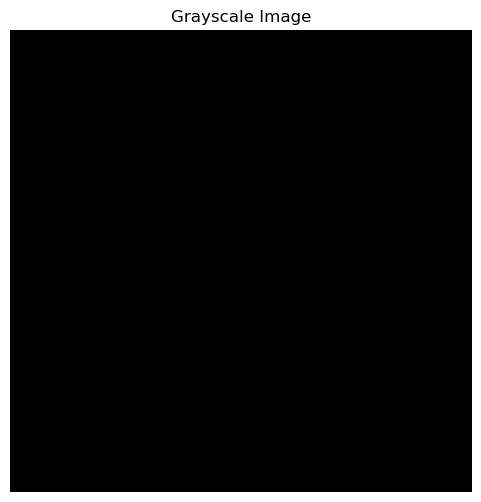

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def create_blank_image_numpy():
    """
    Creates a 256*256 grayscale image using NumPy.
    Returns:
        numpy.ndarray: The generated image matrix.
    """
    # Define dimensions
    width = 256
    height = 256

    # Creates the Matrix
    # Zeros () initializes the array with 0 
    # dtype = np.uint8 ensures strictly 8_bit integrs(0_255)
    image_matrix = np.zeros((height, width), dtype = np.uint)
    
    print(f"Image Shape: {image_matrix.shape}")
    print(f"Data Type: {image_matrix.dtype}")
    print(f"Min Value: {image_matrix.min()}, Max Value: {image_matrix.max()}")
    return image_matrix

def visualize_image(image_data):
    """
    Visualizes the raw matrix as an image using Matplotlib.
    """
    plt.figure(figsize=(6, 6))
    # We use vmin=0 and vmax=255 to ensure the colormap is anchored correctly
    # cmap='gray' ensures it is rendered in grayscale, not a heat map
    plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)

    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()

if __name__=='__main__':
    # Generate
    black_image = create_blank_image_numpy()
    #Visulize
    visualize_image(black_image)

# Exercise 2
Given a grayscale image array, normalize it to [0, 1].

In [103]:
import numpy as np

def normalize_image_min_max(image_array):
    """
    Normalizes a grayscale image array to the range [0, 1] using Min-Max scaling.
    
    Mathematically:
        X_norm = (X - X_min) / (X_max - X_min)
        
    Args:
        image_array (numpy.ndarray): Input image (any dimension, any dtype).
        
    Returns:
        numpy.ndarray: Normalized image with dtype float64.
    """
    # 1. Convert to float to ensure precision during division
    img_float = image_array.astype(np.float64)
    
    # 2. Calculate actual Min and Max pixel intensities
    min_val = np.min(img_float)
    max_val = np.max(img_float)
    
    print(f"Original Range: [{min_val}, {max_val}]")
    
    # 3. Handle Edge Case: Constant Image (Solid Color)
    # If max == min, we have a division by zero risk.
    if max_val - min_val == 0:
        print("Warning: Image is constant (all pixels have same value). Returning zero array.")
        return np.zeros_like(img_float)
    
    # 4. Apply Normalization Formula
    normalized_img = (img_float - min_val) / (max_val - min_val)
    
    return normalized_img

def normalize_standard_scaling(image_array):
    """
    Normalizes an 8-bit image by dividing by 255.
    This preserves the relative darkness of pixels (e.g., 10 does not become 0).
    """
    return image_array.astype(np.float64) / 255.0

if __name__ == "__main__":
    # Create a dummy grayscale image (5x5) with random integers between 50 and 200
    # We purposefully avoid 0 and 255 to show the difference between methods
    np.random.seed(42)
    dummy_image = np.random.randint(50, 200, (5, 5), dtype=np.uint8)
    
    print("--- Input Image Sample ---")
    print(dummy_image)
    print("-" * 30)

    # Apply Min-Max Normalization
    norm_img = normalize_image_min_max(dummy_image)
    
    print("\n--- Normalized Image (Min-Max) ---")
    print(np.round(norm_img, 3)) # Rounding for display clarity
    print(f"New Min: {np.min(norm_img)}")
    print(f"New Max: {np.max(norm_img)}")
    
    # Verification checks
    assert np.isclose(np.min(norm_img), 0.0), "Min value is not 0"
    assert np.isclose(np.max(norm_img), 1.0), "Max value is not 1"
    print("\n[Success] The image matrix is strictly bound between 0.0 and 1.0.")


--- Input Image Sample ---
[[152 145 111 142  53]
 [148  64 199  96 156]
 [149 121 115  70  94]
 [152  89 171  74  84]
 [164 115  89  75 124]]
------------------------------
Original Range: [53.0, 199.0]

--- Normalized Image (Min-Max) ---
[[0.678 0.63  0.397 0.61  0.   ]
 [0.651 0.075 1.    0.295 0.705]
 [0.658 0.466 0.425 0.116 0.281]
 [0.678 0.247 0.808 0.144 0.212]
 [0.76  0.425 0.247 0.151 0.486]]
New Min: 0.0
New Max: 1.0

[Success] The image matrix is strictly bound between 0.0 and 1.0.


# Exercise 3
Compute the mean pixel value of each channel in an RGB image.


In [106]:
import numpy as np
import cv2

def compute_channel_means(image_tensor):
    """
    Computes the mean of each channel in an image tensor.
    
    Args:
        image_tensor (np.ndarray): Input image of shape (H, W, C).
        
    Returns:
        np.ndarray: An array of shape (C,) containing the mean of each channel.
    """
    # Check if the image actually has 3 dimensions
    if image_tensor.ndim != 3:
        raise ValueError(f'Input must be 3D(H, W, C). Recieved shape {image_tensor.shape}')
    means = np.mean(image_tensor, axis=(0, 1), dtype=np.float64)
    return means

if __name__ == '__main__':
    height, width = 100, 100
    # Initialize with zeros
    synth_img = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Let's make the Red channel value 100 everywhere
    synth_img[:, :, 0] = 100
    
    # Fill Green Channel with 200
    synth_img[:, :, 1] = 200
    
    # Fill Blue Channel with random noise, average ~127.5
    np.random.seed(42)
    synth_img[:, :, 2] = np.random.randint(0, 256, (height, width))
    
    # 2. Compute Means
    means = compute_channel_means(synth_img)
    
    # 3. Output Results
    print(f"Image Shape: {synth_img.shape}")
    print("-" * 30)
    print(f"Calculated Means:")
    print(f"Channel 0 (Red):   {means[0]:.4f} (Expected: 100.0)")
    print(f"Channel 1 (Green): {means[1]:.4f} (Expected: 200.0)")
    print(f"Channel 2 (Blue):  {means[2]:.4f} (Expected ~127.5)")
    
    print("-" * 30)
    print("Return Data Type:", means.dtype)

Image Shape: (100, 100, 3)
------------------------------
Calculated Means:
Channel 0 (Red):   100.0000 (Expected: 100.0)
Channel 1 (Green): 200.0000 (Expected: 200.0)
Channel 2 (Blue):  127.6827 (Expected ~127.5)
------------------------------
Return Data Type: float64
